<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_2_1_linear_regression_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A

## Comando:

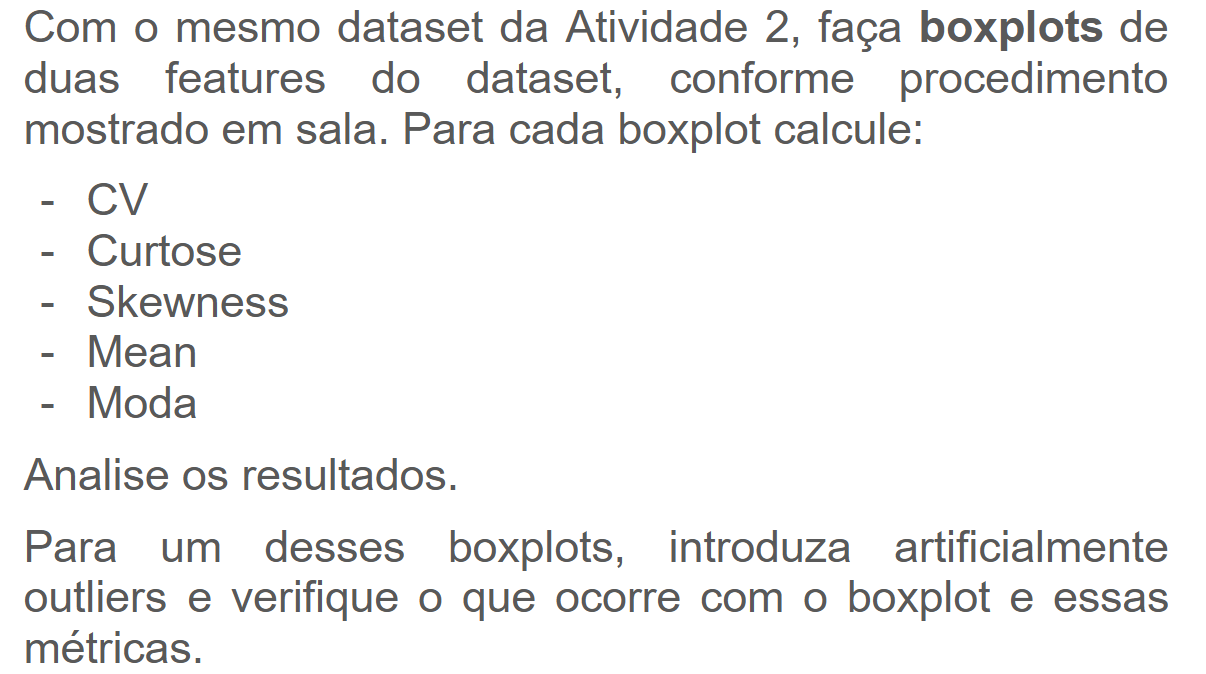

## Resolução:

In [283]:
pip install ucimlrepo

### Cardiotocography

Campos, D. & Bernardes, J. (2000). Cardiotocography [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51S4N.

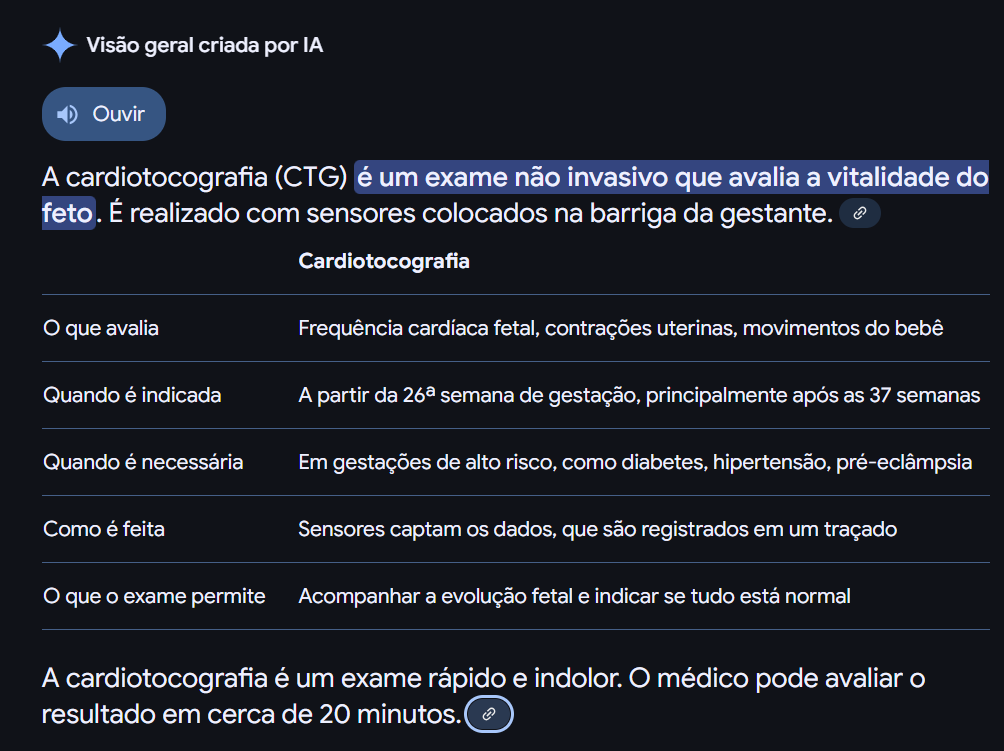

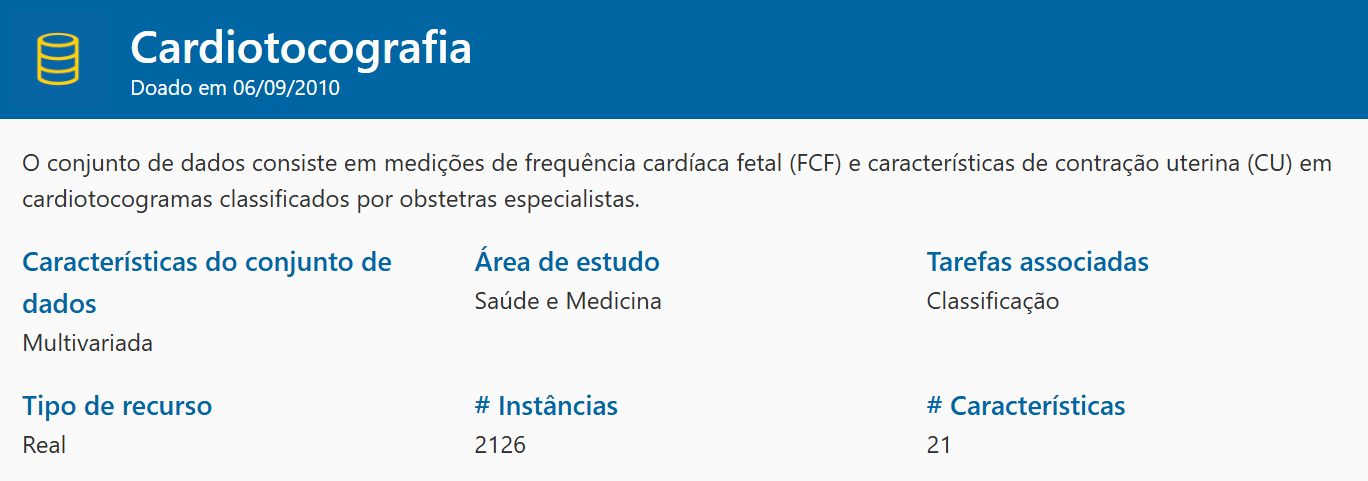

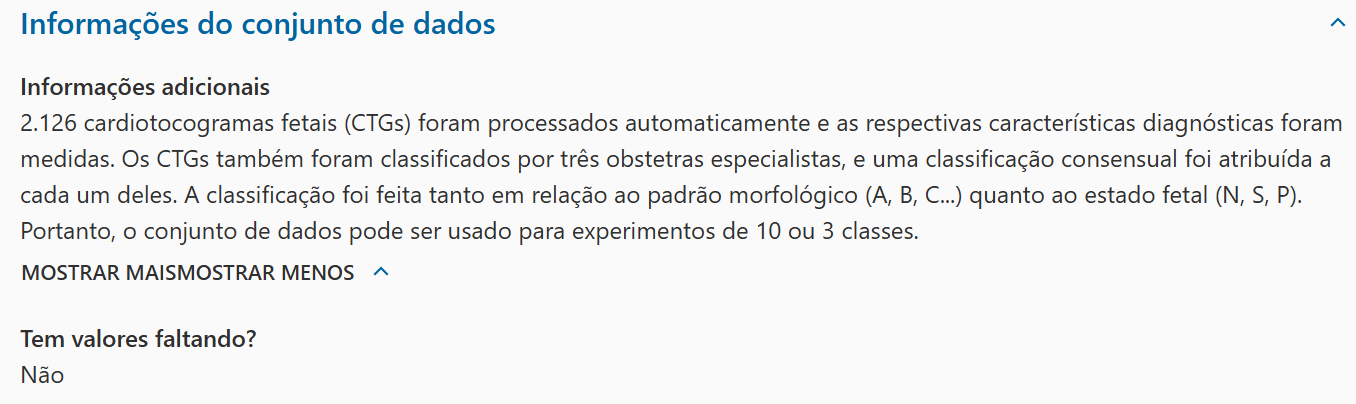

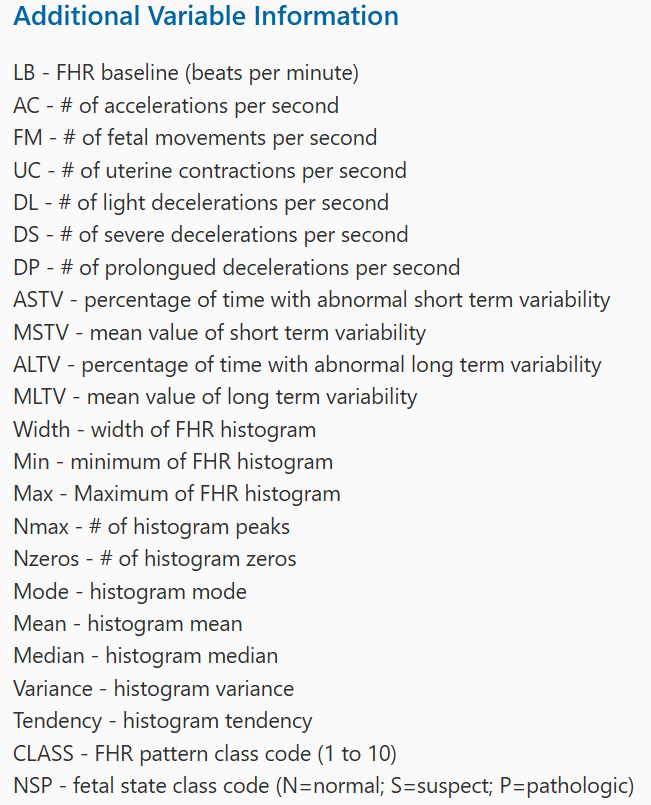

In [284]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, mode

In [285]:
# 1. Busca o dataset
cardiotocography = fetch_ucirepo(id=193)

# Guarda as features e as classes em dataframe
df_features = cardiotocography.data.features
df_class = cardiotocography.data.targets

# Junta as features e as classes em um unico dataframe
df = pd.concat([df_features, df_class], axis=1)

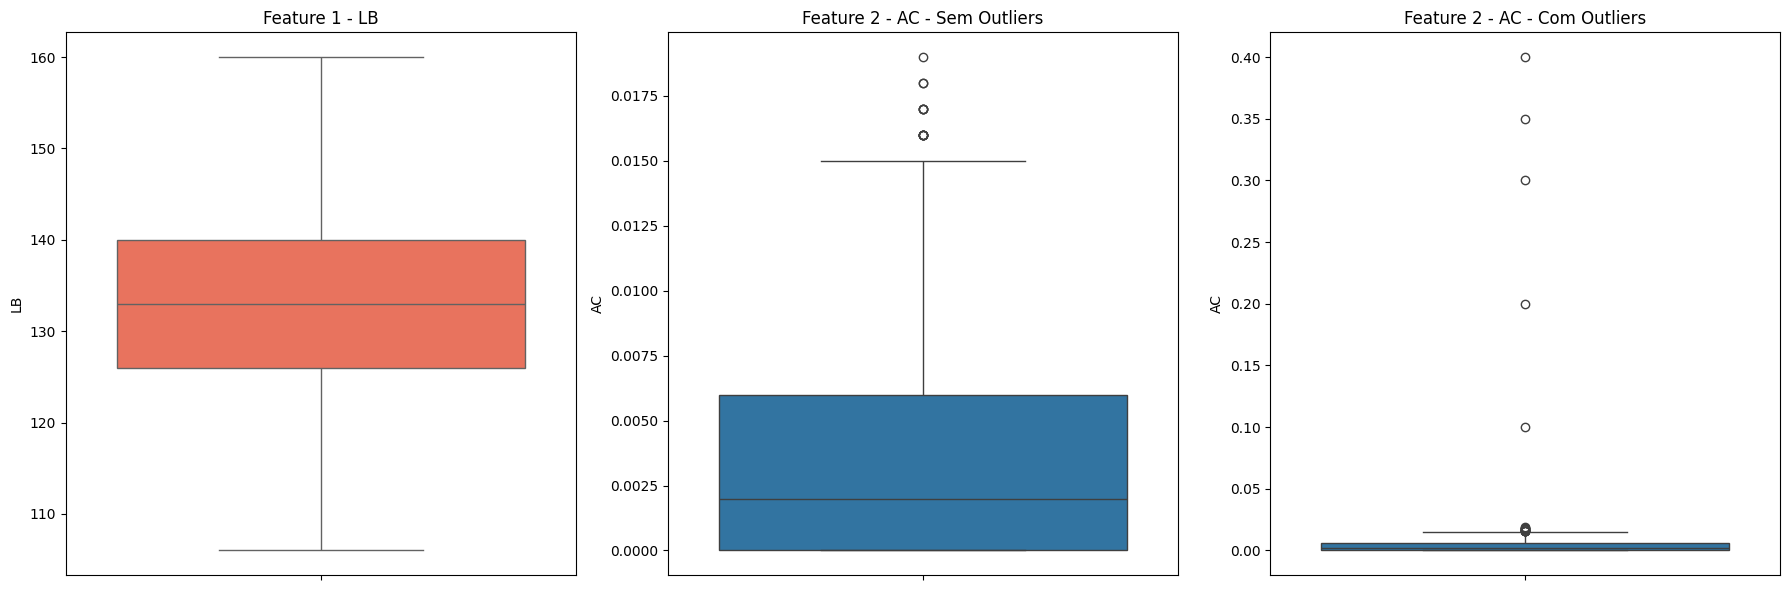


--- Estatísticas de Feature 1 ---
Média: 133.3039
Desvio Padrão: 9.8408
CV: 0.0738
Curtose: -0.2951
Skewness: 0.0203
Moda: 133.0000

--- Estatísticas de Feature 2 (sem outliers) ---
Média: 0.0032
Desvio Padrão: 0.0039
CV: 1.2163
Curtose: 0.7630
Skewness: 1.2035
Moda: 0.0000

--- Estatísticas de Feature 2 (com outliers) ---
Média: 0.0038
Desvio Padrão: 0.0145
CV: 3.8032
Curtose: 515.5613
Skewness: 21.4761
Moda: 0.0000


In [286]:
# 2. Inserir outliers em feature_2
outliers = np.array([0.1000, 0.2000, 0.3000, 0.3500, 0.4000])
df_outlier = df.copy()
df_outlier.loc[df_outlier.index[:len(outliers)], 'AC'] = outliers

# 3. Função para calcular estatísticas
def calcular_estatisticas(feature):
    media = np.mean(feature)
    desvio_padrao = np.std(feature, ddof=1)
    cv = desvio_padrao / media
    curtose_val = kurtosis(feature)
    skewness_val = skew(feature)
    moda_val = mode(feature, keepdims=False).mode

    return {
        'Média': media,
        'Desvio Padrão': desvio_padrao,
        'CV': cv,
        'Curtose': curtose_val,
        'Skewness': skewness_val,
        'Moda': moda_val
    }

# 4. Plotar boxplots (antes e depois dos outliers da feature 2 e feature 1)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['LB'], color='tomato')
plt.title('Feature 1 - LB')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['AC'])
plt.title('Feature 2 - AC - Sem Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_outlier['AC'])
plt.title('Feature 2 - AC - Com Outliers')

plt.tight_layout()
plt.show()

# 5. Imprimir estatísticas
features = {
    'Feature 1': df['LB'],
    'Feature 2 (sem outliers)': df['AC'],
    'Feature 2 (com outliers)': df_outlier['AC']
}

for nome, serie in features.items():
    print(f"\n--- Estatísticas de {nome} ---")
    stats = calcular_estatisticas(serie)
    for k, v in stats.items():
        print(f"{k}: {v:.4f}")


### Observações:
* Boxplot com outliers: Expansão dos bigodes (whiskers) e Aparição de mais pontos fora da caixa.

* Para a feature 1 o CV é baixo indicando que os dados estão proximos da média (pouca variabilidade).

* Para a feature 2 o CV pode ser erroneo pois a média é proxima de zero mesmo apos inserir os outliers.

* Média e desvio padrão: aumentaram apos a insersão dos outliers na feature 2.

* Curtose e Skewness: aumentam significativamente com a insenção de outliers na feture 2, indicando que a media é muito maior que a mediana, maior dispersão e assimetria.

* Moda: para a feature 2 não mudou apos inserir os outliers, pois representa o valor mais frequente.

# B

## Comando:

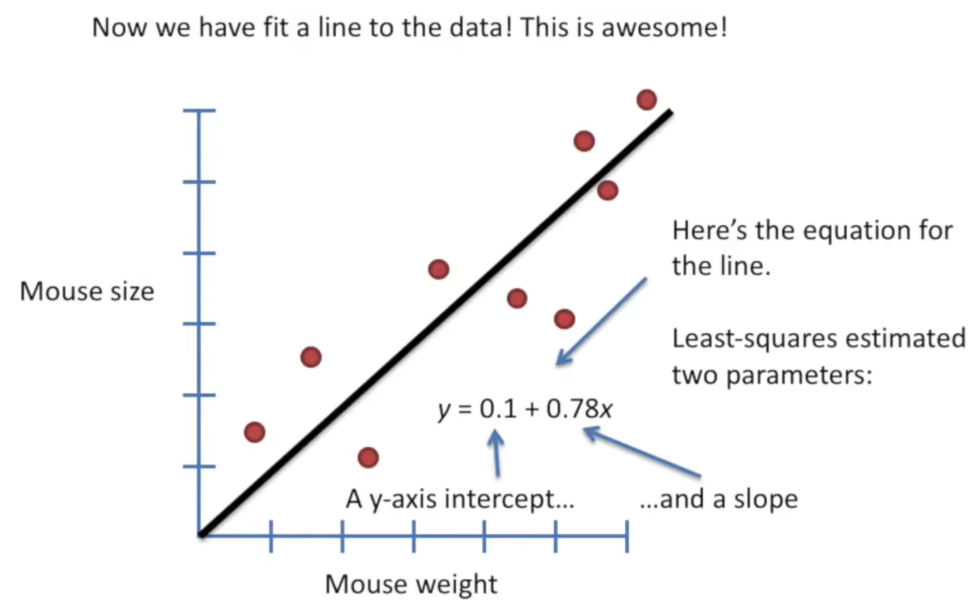

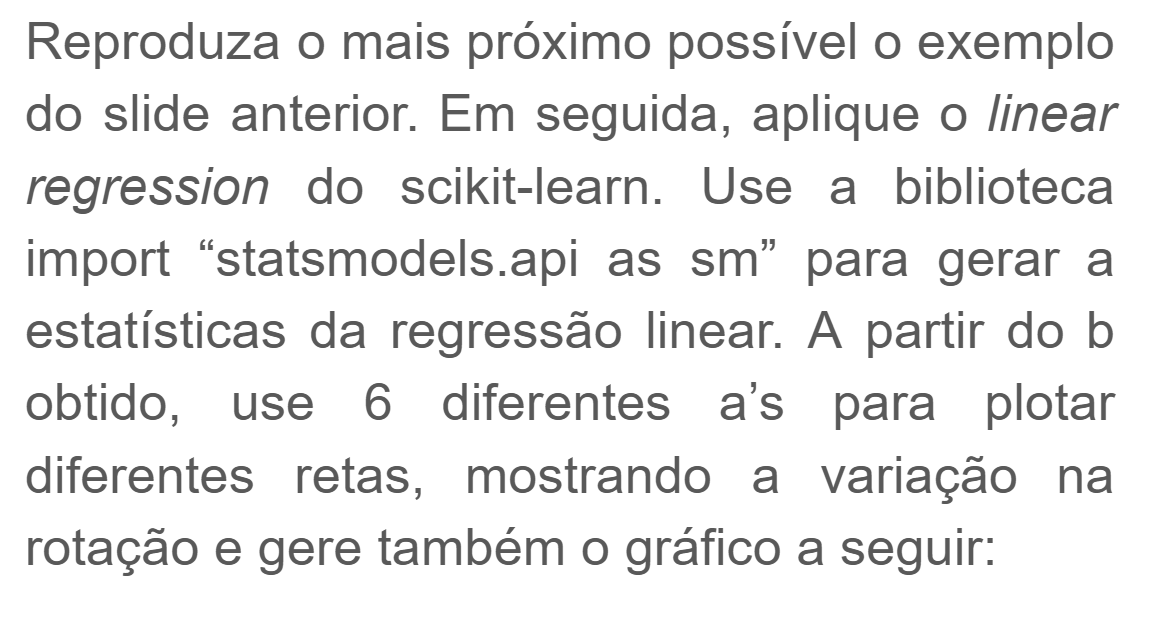

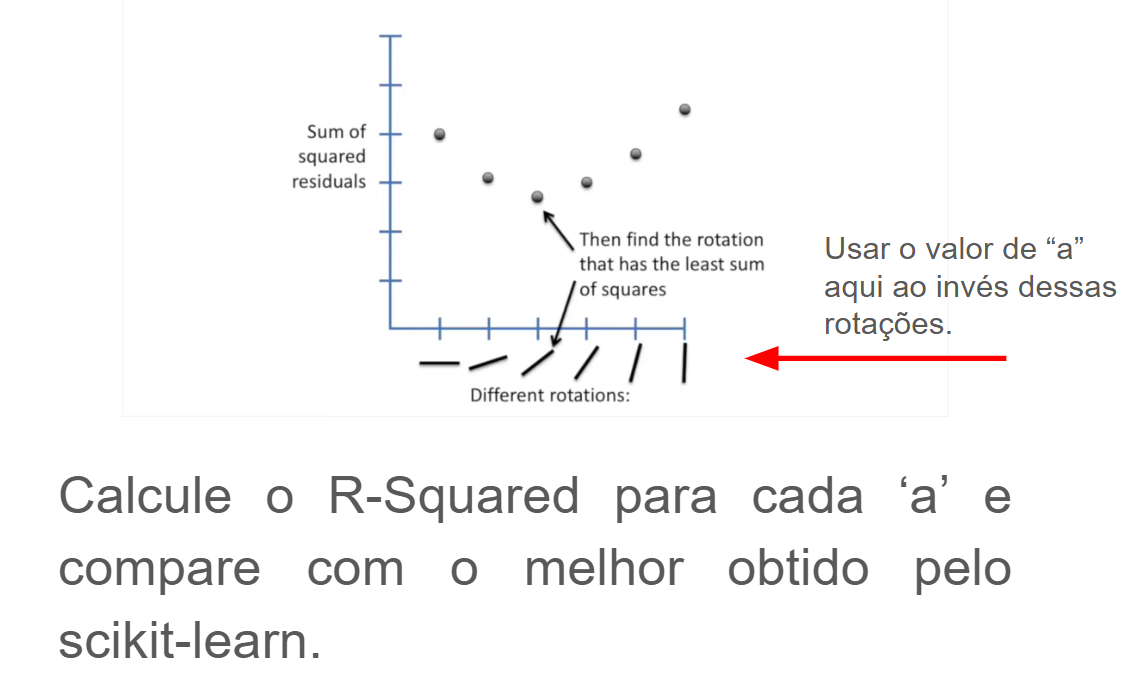

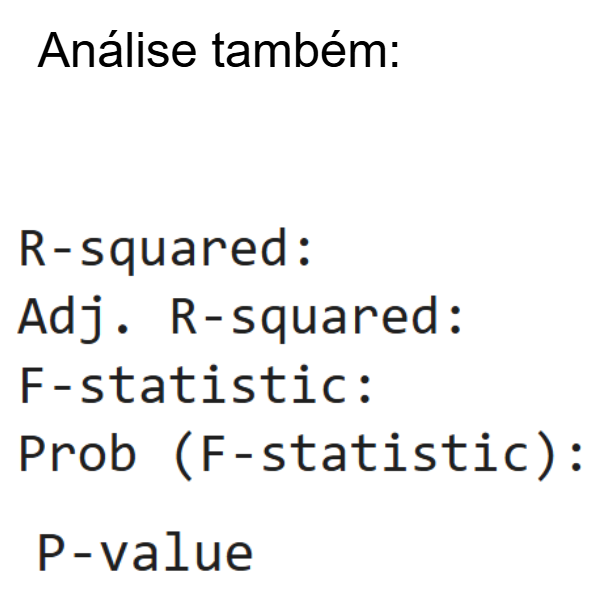

## Resolução:

R-squared: 0.8584184198284888

Statisticas:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     26.59
Date:                Fri, 23 May 2025   Prob (F-statistic):            0.00360
Time:                        09:53:01   Log-Likelihood:                -7.9711
No. Observations:                   7   AIC:                             19.94
Df Residuals:                       5   BIC:                             19.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


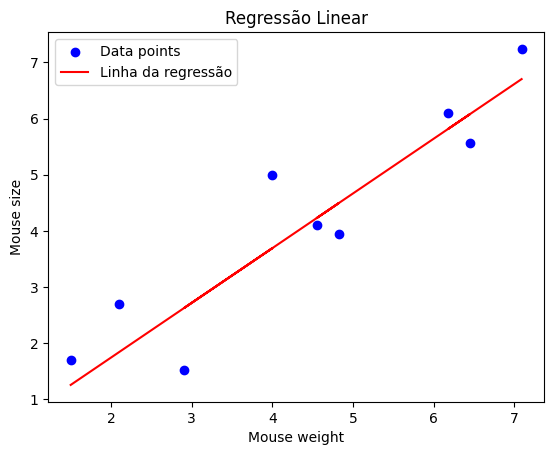

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

X_original = np.array([1.5, 2.1, 4.00, 2.91, 4.82, 4.55, 6.45, 6.18, 7.09])
y_original = np.array([1.7, 2.70, 5.00, 1.52, 3.95, 4.10, 5.57, 6.10, 7.24])

X_original = X_original.reshape(-1, 1)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Criando o modelo
model = LinearRegression()
# Treinando o modelo
model.fit(X_train, y_train)
# Fazendo previsões
y_pred = model.predict(X_test)

# Calculando R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Usando statsmodels para gerar a estatísticas da regressão linear
X_train_sm = sm.add_constant(X_train)  # Add intercept manualmente
ols_model = sm.OLS(y_train, X_train_sm).fit()  # método dos mínimos quadrados (OLS)
print("\nStatisticas:")
print(ols_model.summary())

# Extraindo o valor-p (p-value) do coeficiente angular
p_value = ols_model.pvalues[1]
print(f"P-value do coeficiente angular: {p_value}")
"""
O valor-p é uma medida estatística usada para testar se o coeficiente da regressão é significativamente diferente de zero.
Em outras palavras:
Ele testa a hipótese nula de que o coeficiente (inclinação) = 0 (ou seja, que não há relação entre a variável explicativa e a variável resposta).
"""

plt.scatter(X_original, y_original, color='blue', label='Data points')
plt.plot(X_original, model.predict(X_original), color='red', label='Linha da regressão')
plt.title('Regressão Linear')
plt.xlabel('Mouse weight')
plt.ylabel('Mouse size')
plt.legend()
plt.show()

* R² = 0.842 indica que aproximadamente 84,2% da variação nos valores de y pode ser explicada pela variável X no modelo.
Isso sugere um bom ajuste do modelo — ou seja, o modelo explica bem a relação entre X e y.

* Adjusted R-squared = Leva em conta o número de variáveis independentes no modelo e o tamanho da amostra. Como tem apenas uma variável explicativa, o R² ajustado fica próximo ao R².

* F-statistic = Um valor alto da estatística F indica que seu modelo é melhor que um modelo sem variáveis independentes (modelo "nulo"). 26.59 é um valor alto para um modelo simples, indicando que o modelo é significativo.

* Prob (F-statistic) = é o P-value associado ao teste F - Como o p-valor é muito pequeno (menor que 0.05), rejeitamos a hipótese nula de que o modelo não tem valor explicativo.
Ou seja, seu modelo é estatisticamente significativo

*  P-value do coeficiente angular = 0.0035. Como é muito pequeno indica que as chances da variavel independente explicar a dependente por acaso são extremamente baixas

In [288]:
# Coeficiente angular (a)
a = model.coef_

# Intercepto (b)
b = model.intercept_

# Exibindo a equação
print(f"Função ajustada: y = {a[0]:.2f}x + {b:.2f}")

Função ajustada: y = 0.97x + -0.20


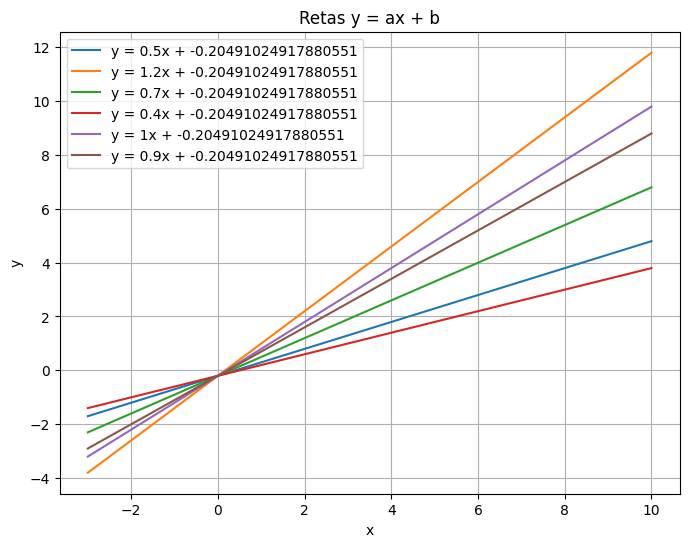

In [289]:
# Define um intervalo de x para o gráfico
x = np.linspace(-3, 10, 50)  # 50 pontos de -3 a 10

a_values = [0.5, 1.2, 0.7, 0.4, 1, 0.9]

# Exemplo de coeficientes a e b
coeficientes = [(a, b) for a in a_values]

plt.figure(figsize=(8, 6))

for a, b in coeficientes:
    yi = a * x + b  # Calcula y para cada x
    plt.plot(x, yi, label=f'y = {a}x + {b}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Retas y = ax + b')
plt.legend()
plt.grid(True)
plt.show()

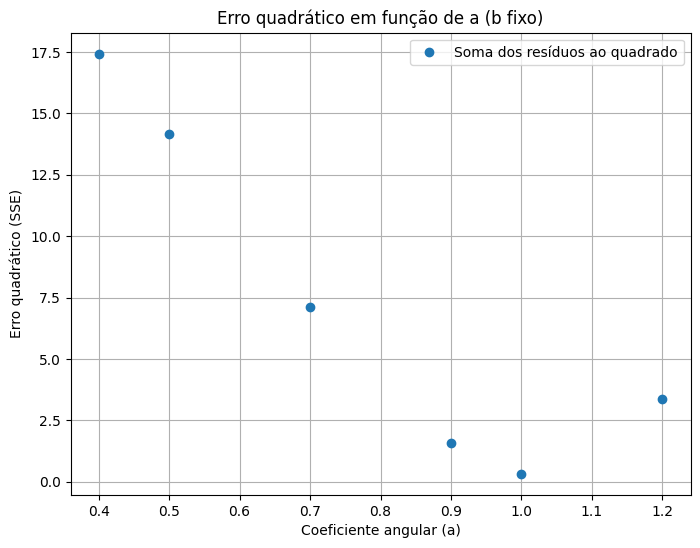

In [290]:
errors = []
r2_squares = []

for a in a_values:
    y_pred = a * a * X_test.flatten() + b
    r2 = r2_score(y_test, y_pred)
    erro = mean_squared_error(y_test, y_pred)

    r2_squares.append(r2)
    errors.append(erro)

# Plotando Erro(a) vs a
plt.figure(figsize=(8, 6))
plt.plot(a_values, errors, 'o', label='Soma dos resíduos ao quadrado')
plt.xlabel('Coeficiente angular (a)')
plt.ylabel('Erro quadrático (SSE)')
plt.title('Erro quadrático em função de a (b fixo)')
plt.grid(True)
plt.legend()
plt.show()

[-3.8997782654643203, -0.1668722629699908, -1.466413377170852, -5.031198624525927, 0.8852105398645331, 0.457251327404984]


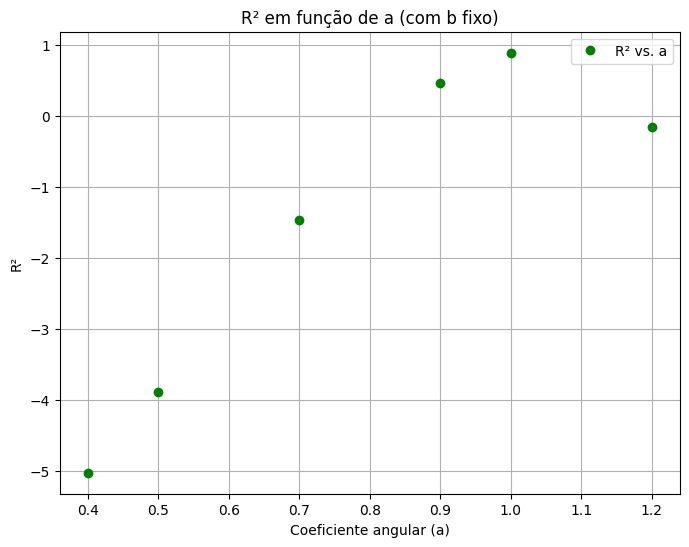

In [291]:
print(r2_squares)
# Plotando R² vs. a
plt.figure(figsize=(8, 6))
plt.plot(a_values, r2_squares, 'o', color='green', label='R² vs. a')
plt.xlabel('Coeficiente angular (a)')
plt.ylabel('R²')
plt.title('R² em função de a (com b fixo)')
plt.grid(True)
plt.legend()
plt.show()

$$
R^2 = 1 \Rightarrow \text{Ajuste perfeito}
$$

$$
R^2 = 0 \Rightarrow \text{Tão ruim quanto usar a média}
$$

$$
R^2 < 0 \Rightarrow \text{Pior que usar a média}
$$
